In [1]:
pwd

'F:\\puran\\Data_science\\ML_Sudhanshu_Sir\\Logistic_reg_assignment'

In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
dta = sm.datasets.fair.load_pandas().data

In [28]:
from pandas_profiling import ProfileReport

In [6]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [7]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [58]:
dta['affair'] = (dta.affairs>0).astype(int)

In [59]:
#dta['afair'] = (dta.affairs).astype(int)

In [60]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [19]:
dta.affairs

0       0.111111
1       3.230769
2       1.400000
3       0.727273
4       4.666666
          ...   
6361    0.000000
6362    0.000000
6363    0.000000
6364    0.000000
6365    0.000000
Name: affairs, Length: 6366, dtype: float64

In [17]:
type(dta.affairs[0])

numpy.float64

In [18]:
type(dta.affair[0])

numpy.int32

In [63]:
dta.drop(columns = 'affairs', axis = 1, inplace = True)

In [29]:
ProfileReport(dta)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

<IPython.core.display.Javascript object>

<AxesSubplot:>

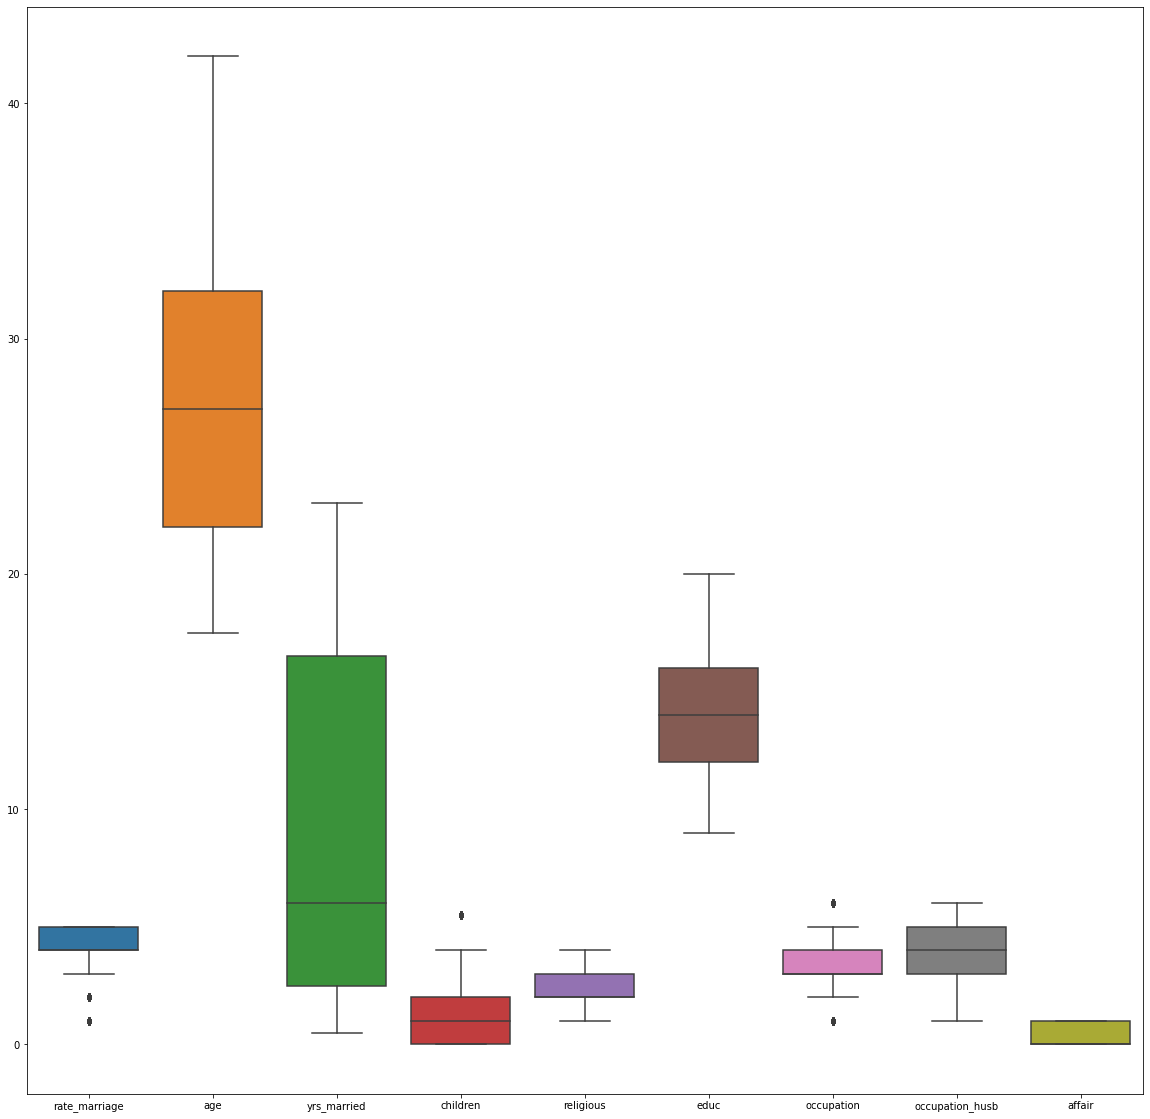

In [65]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = dta, ax = ax)

def outlier_removal(self,data):
        def outlier_limits(col):
            Q3,Q1 = np.nanpercentile(col,[75,25])
            IQR = Q3-Q1
            UL = Q3+1.5*IQR
            LL = Q1-1.5*IQR
            return UL, LL
        for column in data.columns:
            if data[column].dtype!= 'int64'
            UL, LL = outlier_limits(data[column])
            data[column] = np.where(data[column]>UL) | (data[column]<LL), np.nan, data[column]
        return data

def outlier_removal(self,dta):
        def outlier_limits(col):
            Q3,Q1 = np.nanpercentile(col,[75,25])
            IQR = Q3-Q1
            UL = Q3+1.5*IQR
            LL = Q1-1.5*IQR
            return UL, LL
        for column in dta.columns:
            if dta[column].dtype!= 'int64':
                UL, LL = outlier_limits(dta[column])
                dta[column] = np.where(dta[column]>UL) | (dta[column]<LL), np.nan, dta[column]
        return dta

In [44]:
dta.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affair               int32
dtype: object

<IPython.core.display.Javascript object>

<AxesSubplot:>

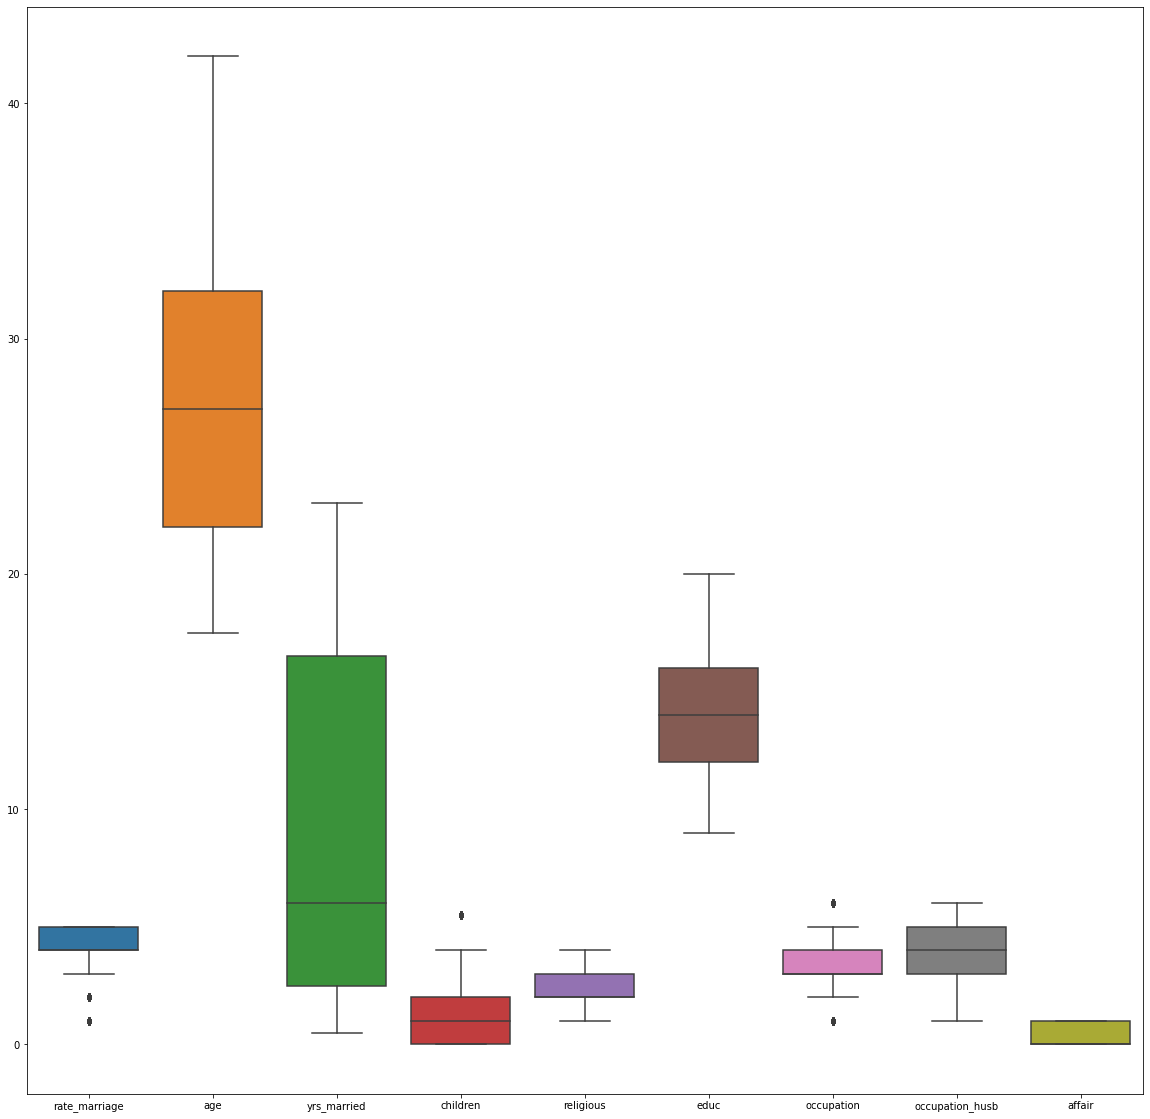

In [46]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = dta, ax = ax)

In [33]:
dta.drop(['affairs'], axis=1, inplace= True)

In [66]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


y, X = dmatrices('affair ~ rate_marriage + age +
yrs_married + children + \ religious + educ +
C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

In [67]:
y = dta.affair
X = dta.drop(columns = ['affair'])

In [125]:
X.head(10)

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,9.0,1.0,1.0,14.0,3.0,4.0
5,4.0,9.0,0.0,2.0,14.0,3.0,4.0
6,5.0,23.0,5.5,2.0,12.0,5.0,4.0
7,5.0,23.0,5.5,2.0,12.0,2.0,3.0
8,3.0,2.5,0.0,2.0,12.0,3.0,3.0
9,3.0,6.0,0.0,1.0,16.0,3.0,5.0


In [163]:
#type(y)

In [162]:
#y.head(10)

In [70]:
scalar = StandardScaler()

In [71]:
X_scaled = scalar.fit_transform(X)

In [72]:
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
         1.28115287e+00, -1.51129246e+00,  8.54069123e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -4.50087100e-01,  8.54069123e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -9.63641611e-02, -4.50087100e-01, -2.11697133e+00],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -1.51129246e+00,  1.11309009e-01]])

<IPython.core.display.Javascript object>

<AxesSubplot:>

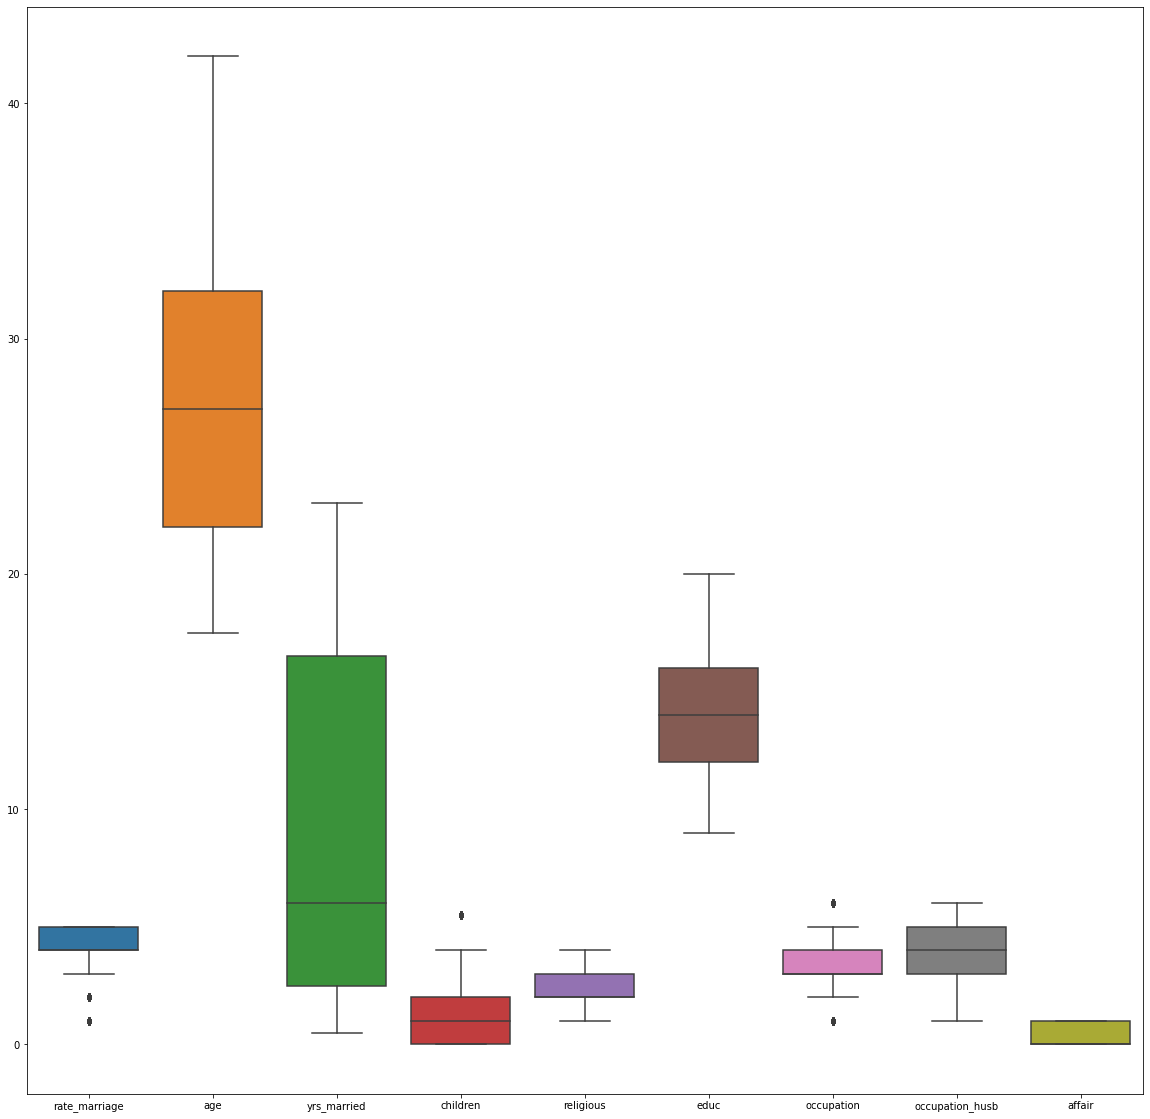

In [73]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = dta, ax = ax)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
df = pd.DataFrame()
df['vif'] = [variance_inflation_factor(X_scaled,i) for i in range (X_scaled.shape[1])]
df['features'] = X.columns

In [77]:
df

,vif,features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


In [80]:
y = dta.affair
X = dta.drop(columns = ['age','affair'])

In [81]:
X

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,9.0,1.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...,...
6361,5.0,13.0,2.0,3.0,17.0,4.0,3.0
6362,4.0,13.0,1.0,1.0,16.0,5.0,5.0
6363,5.0,2.5,0.0,2.0,14.0,3.0,1.0
6364,5.0,6.0,1.0,3.0,14.0,3.0,4.0


In [82]:
scalar = StandardScaler()

In [83]:
X_scaled = scalar.fit_transform(X)

In [136]:
X_scaled[0]

array([-1.15425213e+00, -1.29473293e-03,  1.11844056e+00,  6.53341477e-01,
        1.28115287e+00, -1.51129246e+00,  8.54069123e-01])

In [85]:
df = pd.DataFrame()
df['vif'] = [variance_inflation_factor(X_scaled,i) for i in range (X_scaled.shape[1])]
df['features'] = X.columns

In [86]:
df

,vif,features
0,1.034503,rate_marriage
1,2.533513,yrs_married
2,2.525537,children
3,1.035786,religious
4,1.226246,educ
5,1.204830,occupation
6,1.080146,occupation_husb


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logi_reg = LogisticRegression(verbose = 1, solver = 'saga')

In [90]:
logi_reg.fit(X_train, y_train)

convergence after 18 epochs took 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(solver='saga', verbose=1)

In [153]:
#saving the file on the local system
filename = 'log_reg_assign_model.pickle'
pickle.dump(logi_reg, open(filename, 'wb'))

<IPython.core.display.Javascript object>

In [161]:
pwd

'F:\\puran\\Data_science\\ML_Sudhanshu_Sir\\Logistic_reg_assignment'

In [159]:
#prediction uusing saved model
reg_model = pickle.load(open(filename, 'rb'))
a = reg_model.predict([X_scaled[19]])
a

<IPython.core.display.Javascript object>

array([0])

In [91]:
X_test[0]

array([-1.15425213e+00, -1.29473293e-03,  4.20778258e-01, -1.62378518e+00,
       -9.63641611e-02, -4.50087100e-01,  8.54069123e-01])

In [104]:
y_pred = logi_reg.predict(X_test)

In [160]:
#for i in range(20):
 #   print(logi_reg.predict([X_scaled[i]]))

In [135]:
logi_reg.predict([X_test[0]])

array([1])

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [105]:
confusion_matrix(y_test, y_pred)

array([[805,  80],
       [252, 137]], dtype=int64)

In [107]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [108]:
accuracy = (tp+tn)/(tn+fp+fn+tp)

In [109]:
accuracy

0.7394034536891679

In [112]:
precision = tp/(tp+fp)

In [113]:
precision

0.631336405529954

In [114]:
recall = tp/(tp+fn)

In [115]:
recall

0.35218508997429304

In [116]:
f1_score = 2*(recall*precision)/(recall+precision)

In [117]:
f1_score

0.4521452145214521